<a href="https://colab.research.google.com/github/Yugsolanki/AIML-Healthcare-Lab/blob/main/4_AIML_Hons_Medical_Prognosis_based_on_Patient_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 4<br>
Yug Solanki<br>
BE-4, 58<br>
21UF16526CM057<br>
[Colab Link🔗](https://colab.research.google.com/drive/1Eq-GNoPpLZpJvnbAle1cNPYOHO9t-MZR?usp=sharing)

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 6.67MB/s]


In [ ]:
!unzip heart-disease-data.zip

Archive:  heart-disease-data.zip
  inflating: heart_disease_uci.csv   


# Importing Libraries

In [ ]:
# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [ ]:
df = pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Dataset Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### Separate Columns with Dtype


In [ ]:
# find only categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numeric_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [ ]:
categorical_columns = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_columns = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

# Explore All Columns

### ID Column


In [ ]:
# drop id column
df.drop(['id'],axis=1,inplace=True)

### Age Column

minimun age is : 28
maximun age is : 77
average of age is : 53.51 %


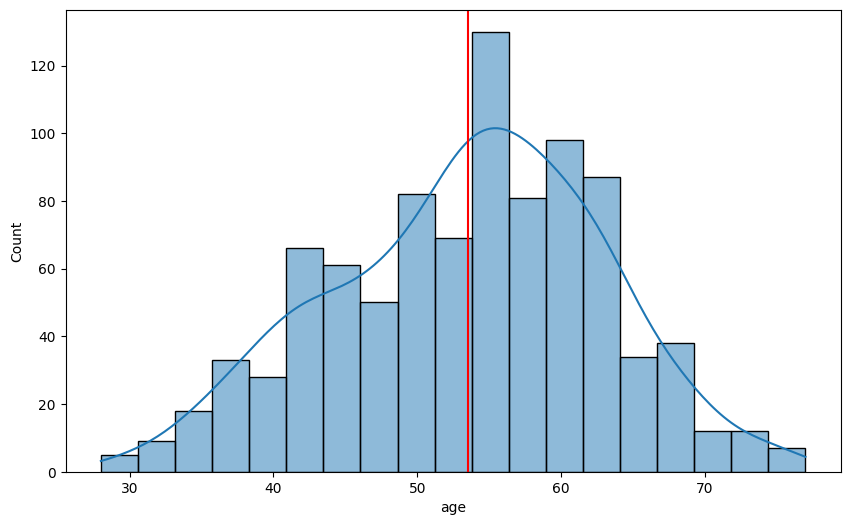

In [ ]:
# check minimum age
print("minimun age is :",df['age'].min())
# check maximum
print("maximun age is :",df['age'].max())
# check average of age
print("average of age is :",df['age'].mean().round(2),"%")
# plot the mean of age column using sns
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')


### Sex Column

In [ ]:
print("count of male & female",df['sex'].value_counts())
male_count = 563
female_count = 182
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

count of male & female sex
Male      726
Female    194
Name: count, dtype: int64
Male percentage in the data: 75.57%
Female Percentage in the data: 24.43%


### Dataset Column

In [ ]:
print("Data collect from :",df['dataset'].value_counts())
# print the values count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())
# barplot of dataset  base on sex
fig = px.bar(df, x='dataset', color='sex')
fig.show()

Data collect from : dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64



### CP Column

In [ ]:
plt.figure(figsize=(10,6))
# value count of cp column
print("value_counts of :",df['cp'].value_counts())
# count plot of cp column by sex column
fig = px.histogram(df, x='cp', color='sex', barmode='group')
fig.show()

value_counts of : cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

In [ ]:
# count plot of cp column by dataset columnplt
fig = px.histogram(df, x='cp', color='dataset', barmode='group')
fig.show()

In [ ]:
plt.figure(figsize=(10,6))
# count plot of age column
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

<Figure size 1000x600 with 0 Axes>

### Trestbps Column

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


<Axes: xlabel='trestbps', ylabel='Count'>

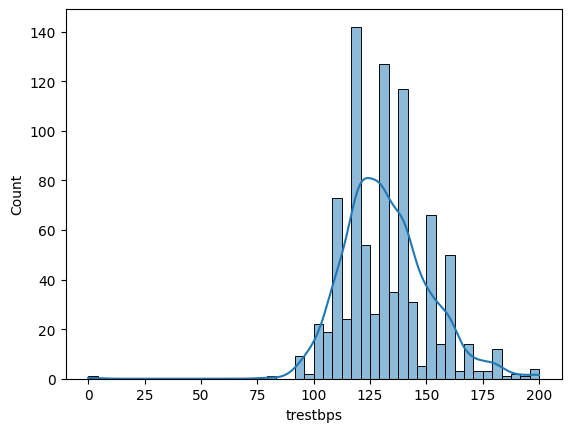

In [ ]:
print(df['trestbps'].describe())
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

### Chol Column

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64


<Axes: xlabel='chol', ylabel='Count'>

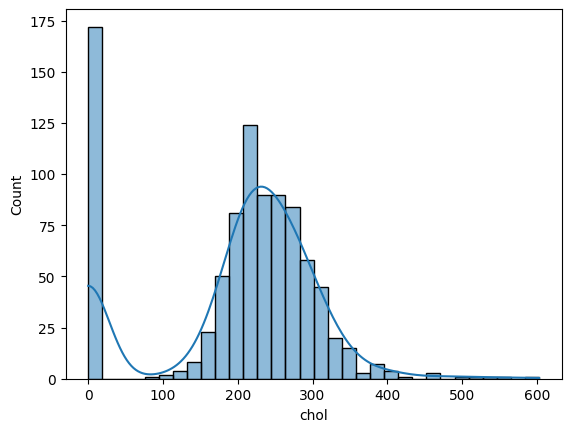

In [ ]:
print(df['chol'].describe())

sns.histplot(df['chol'], kde=True)

### Fbs Column

In [ ]:
df['fbs'].value_counts()

,count
fbs,
False,692
True,138


In [ ]:
fig = px.histogram(df, x='fbs', color='sex', barmode='group')
fig.show()


### Restecg Column

In [ ]:
# check unique values
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [ ]:
df['restecg'][df['restecg'] == 0] = 'normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'left ventricular hypertrophy'

In [ ]:
restecg_counts = df['restecg'].value_counts()
print(restecg_counts)

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


In [ ]:
# remove row where are found Nan values
df.dropna(subset=['restecg'], inplace=True)

### Thalch Column

In [ ]:
df['thalch'].describe()

,thalch
count,863.000000
mean,137.528389
std,25.950226
min,60.000000
25%,120.000000
50%,140.000000
75%,157.000000
max,202.000000


In [ ]:
# make scatter plot between thalch and age column
px.scatter (df,x='thalch',y='age')

### Exang Column

In [ ]:
df['exang'].value_counts()

,count
exang,
False,526
True,337


In [ ]:
plt.figure(figsize=(10,6))

fig = px.histogram(df, x='exang', color='dataset', barmode='group')
fig.show()

<Figure size 1000x600 with 0 Axes>


### Oldpeak Column

In [ ]:
print(df['oldpeak'].describe())

count    856.000000
mean       0.880607
std        1.091840
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64


In [ ]:
# Check for negative values
negative_values = df[df['oldpeak'] < 0]

# Count of negative values
count_negative_values = len(negative_values)
print(f"Count of negative values: {count_negative_values}")

# Convert negative values to positive
df['oldpeak'] = df['oldpeak'].abs()

# Now, print the negative values after converting to positive
negative_values_after_conversion = df[df['oldpeak'] < 0]
count_negative_values_after_conversion = len(negative_values_after_conversion)

print(f"\nCount of negative values after conversion: {count_negative_values_after_conversion}")

Count of negative values: 12

Count of negative values after conversion: 0


In [ ]:
# scatter plot between oldpeak and age
px.scatter (df,x='oldpeak',y='age')

### Slope Column

In [ ]:
# value count of slope
df['slope'].value_counts()

,count
slope,
flat,345
upsloping,202
downsloping,63


In [ ]:
# Create a histrogram based on 'slope ' and 'sex' using Plotly
fig = px.histogram(data_frame=df, x='slope', color='sex', barmode='group')
fig.show()

In [ ]:
# Create a histrogram based on 'slope ' and 'dataset' using Plotly
fig = px.histogram(data_frame=df, x='slope', color='dataset', barmode='group')
fig.show()

### Ca Column

In [ ]:
df['ca'].describe()

,ca
count,309.000000
mean,0.676375
std,0.935653
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


 ### Thal Column



In [ ]:
df['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [ ]:
# create a histrogram based on 'thal ' and 'sex' using Plotly
fig = px.histogram(data_frame=df, x='thal', color='sex', barmode='group')
fig.show()

In [ ]:
# create a histrogram based on 'thal ' and 'sex' using Plotly
fig = px.histogram(data_frame=df, x='thal', color='dataset', barmode='group')
fig.show()

### Num Column


In [ ]:
# unique values in num
print(df['num'].unique())
# check value count
print(df['num'].value_counts())

[0 2 1 3 4]
num
0    411
1    263
2    109
3    107
4     28
Name: count, dtype: int64


# Missing Values

### Explore Missing Values

In [ ]:
# check null values
null_values=df.isnull().sum().sort_values(ascending=False)
print("null_values:\n",null_values)

null_values:
 ca          609
thal        484
slope       308
fbs          89
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
age           0
sex           0
dataset       0
cp            0
restecg       0
num           0
dtype: int64


### HeatMap

<Axes: >

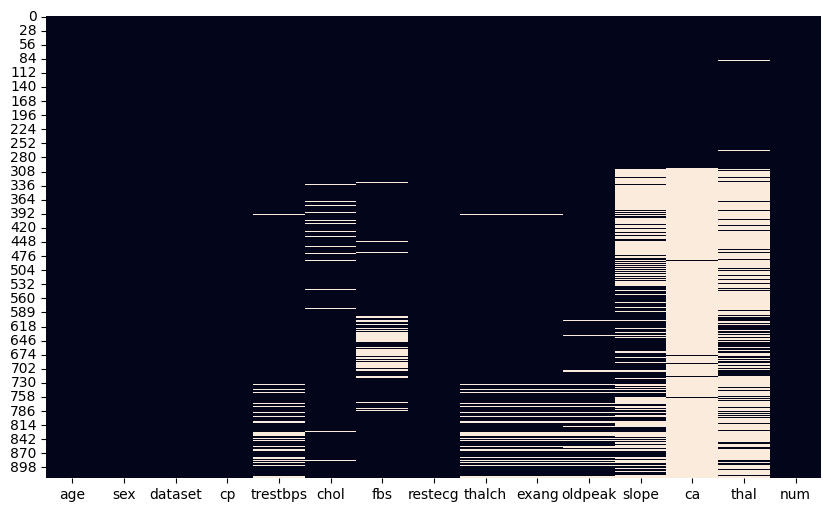

In [ ]:
# Assuming df is your DataFrame
plt.figure( figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)

### Percentage of Null Values

In [ ]:
# calculate the percentage of null values in each column
null_percentage = (df.isnull().sum().sort_values(ascending=False) / len(df)) * 100

# round the percentage to 2 decimal places
null_percentage = null_percentage.round(2)

# print the percentage of null values
print("Percentage of null values:\n", null_percentage)

Percentage of null values:
 ca          66.34
thal        52.72
slope       33.55
fbs          9.69
oldpeak      6.75
trestbps     6.43
thalch       5.99
exang        5.99
chol         3.27
age          0.00
sex          0.00
dataset      0.00
cp           0.00
restecg      0.00
num          0.00
dtype: float64


### Columns of Missing Values


In [ ]:
# print missing data columns
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
print("missing_data_cols",missing_data_cols)
print("----------------------------------------------")
#  print  numerical columns who have missing values
numerical_columns = df.select_dtypes(include='number').columns
missing_numerical_columns = df[numerical_columns].isnull().sum()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns > 0]
print("Numerical columns with missing values:")
for column in missing_numerical_columns.index:
    print(column)
print("----------------------------------------------")
# Print categorical columns who have missing values
categorical_columns = df.select_dtypes(include='object').columns
missing_categorical_columns = df[categorical_columns].isnull().sum()
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns > 0]
print("Categorical columns with missing values:")
for column in missing_categorical_columns.index:
    print(column)


missing_data_cols ['trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
----------------------------------------------
Numerical columns with missing values:
trestbps
chol
thalch
oldpeak
ca
----------------------------------------------
Categorical columns with missing values:
fbs
exang
slope
thal


### Impute Missing Values with Machine Learning

In [ ]:
categorical_cols = ['slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num','thal']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age','ca']

In [ ]:
# define the function to impute the missing values

def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [ ]:
def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [ ]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.43%
MAE = 12.605523255813951 

RMSE = 17.118009029660396 

R2 = 0.05848553110670818 

Missing Values chol : 3.27%
MAE = 51.23814606741573 

RMSE = 69.78789397528499 

R2 = 0.5669485098418734 

Missing Values fbs : 9.69%
The feature 'fbs' has been imputed with 81.93 accuracy

Missing Values thalch : 5.99%
MAE = 17.0128901734104 

RMSE = 21.775728586922863 

R2 = 0.31637518354125416 

Missing Values exang : 5.99%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values oldpeak : 6.75%
MAE = 0.5239593023255814 

RMSE = 0.7614563196560825 

R2 = 0.43706823041083553 

Missing Values slope : 33.55%
The feature 'slope' has been imputed with 68.85 accuracy

Missing Values ca : 66.34%
MAE = 0.6643548387096775 

RMSE = 0.9130302259774247 

R2 = 0.11405822504838259 

Missing Values thal : 52.72%
The feature 'thal' has been imputed with 71.26 accuracy



In [ ]:
# check after imputation
df.isnull().sum()

,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0


<Axes: >

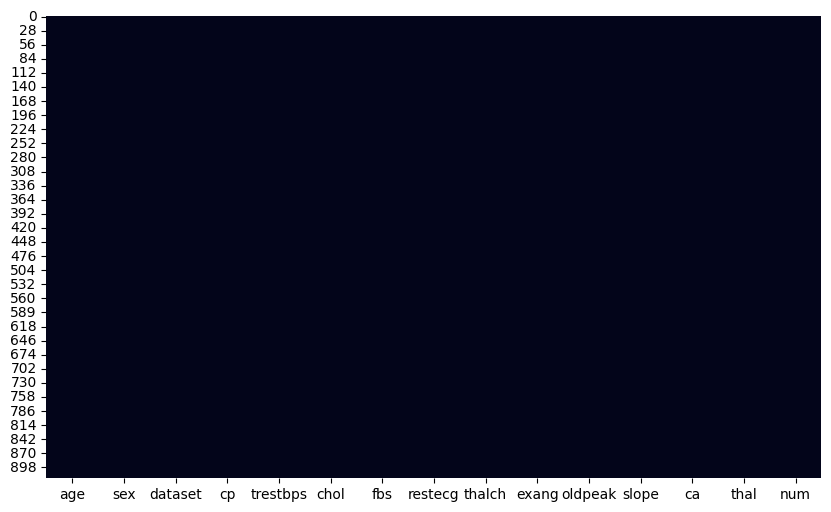

In [ ]:
plt.figure( figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)

# Outliers

### Check Outliers with Graphical Technique

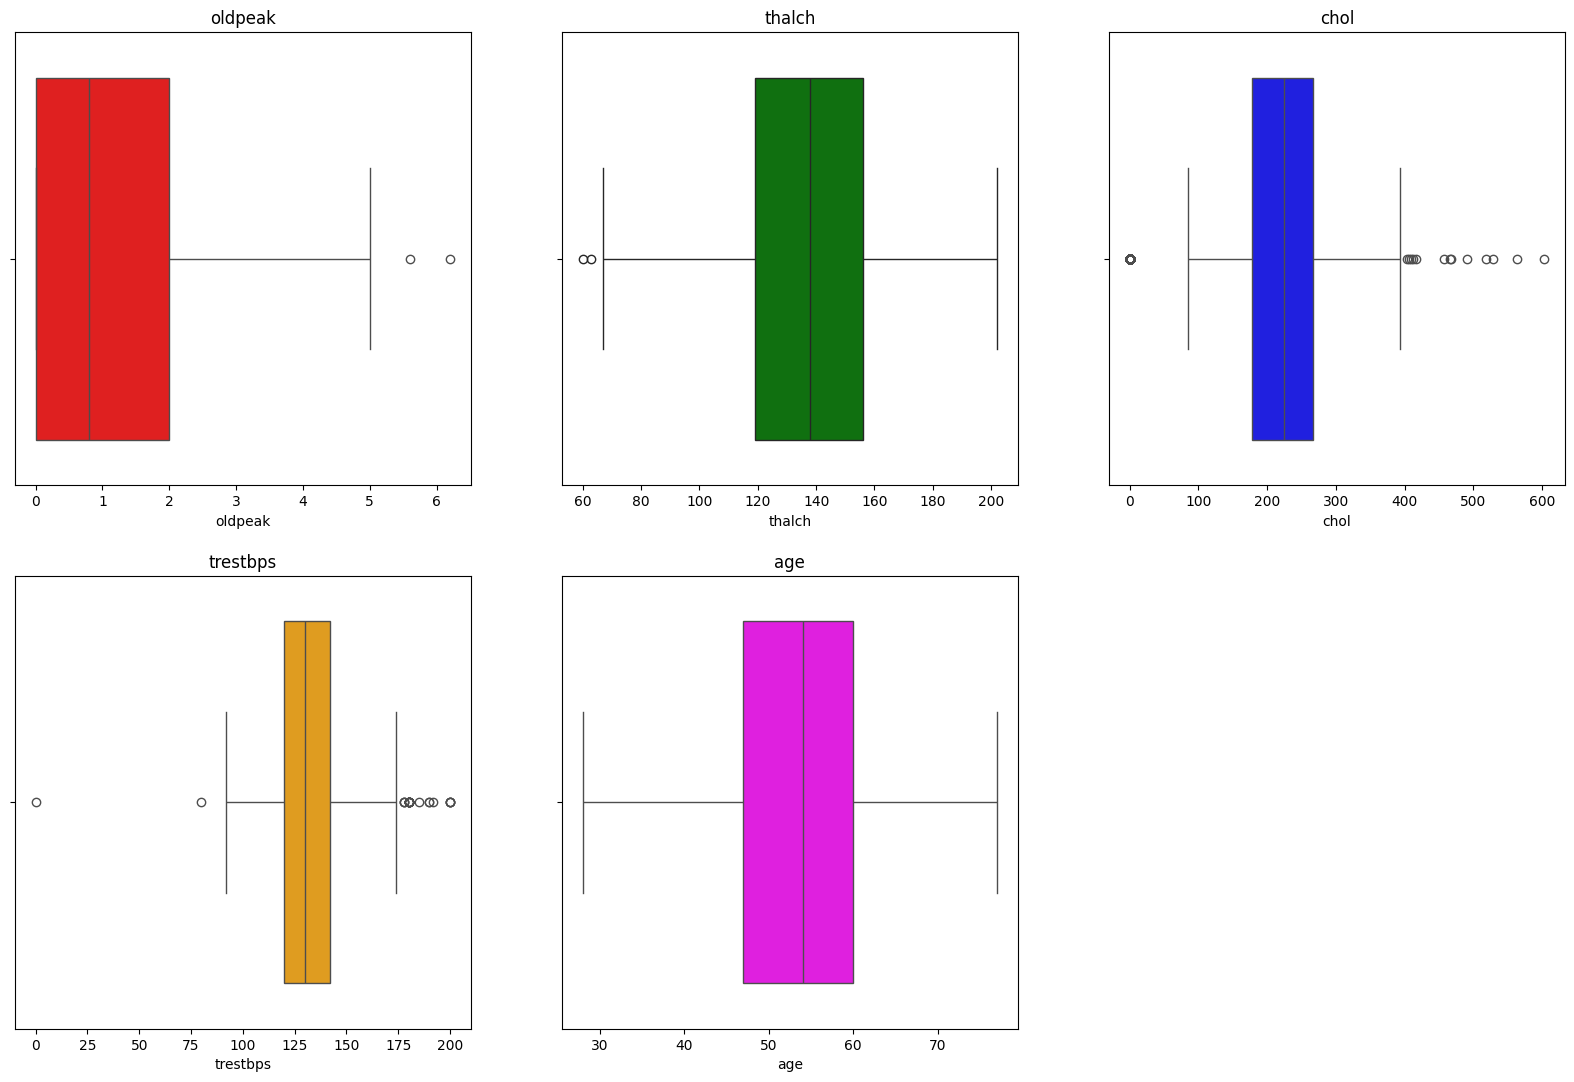

In [ ]:
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'magenta']

# Assuming numeric_cols is a list of numeric column names
for i, col in enumerate(numeric_cols):
    if i < len(colors):  # Check if the index is within the range of colors
        plt.subplot(3, 3, i+1)
        sns.boxplot(x=df[col], color=colors[i])
        plt.title(col)
    else:
        break  # Exit the loop if there are no more colors available

plt.show()

### Check Outliers with IQR Method

In [ ]:

# check number outliers in numeric_cols using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

,0
oldpeak,2
thalch,2
chol,184
trestbps,25
age,0
ca,21


### Deal with Outliers

#### trestbps

In [ ]:
df['trestbps'].describe()

,trestbps
count,918.000000
mean,132.579390
std,18.580314
min,0.000000
25%,120.000000
50%,130.000000
75%,142.000000
max,200.000000


In [ ]:
# remove rows with values less than 80 in the 'trestbps' column
df = df[df['trestbps'] >= 80]

In [ ]:
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,292
VA Long Beach,199
Switzerland,122


#### thalch

In [ ]:
# remove rows with values less than 71 in the 'thalch' column
df = df[df['thalch'] >= 71]

In [ ]:
df['thalch'].describe()

,thalch
count,912.000000
mean,136.940055
std,25.144596
min,71.000000
25%,119.337500
50%,138.000000
75%,156.000000
max,202.000000


#### oldpeak

In [ ]:
# remove outliers in 'oldpeak' column
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df=df[(df['oldpeak'] >= lower_bound) & (df['oldpeak'] <= upper_bound)]

#### chol ( Cholesterol )

In [ ]:
# print the row from df where chol value is 0
print("zero_counts :",(df['chol'] == 0).sum())
# remove this row from data
df = df[df['chol'] != 0]

zero_counts : 166


In [ ]:
# remove values less than 126
df = df[df['chol'] >= 126]
# remove values greater than 400
df = df[df['chol'] <= 400]

# Machine Learning

### Encoded the Data

In [ ]:
#  # apply labelencoder on categorical column
for col in df.columns:
      if df[col].dtype == "category" or df[col].dtype == "object":
          df[col] =LabelEncoder().fit_transform(df[col])
      else:
          pass

### Split the Data into X and y

In [ ]:
# split data into X and y
X = df.drop('num', axis=1)
y = df['num']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Enlist some  models that use to predict the heart disease. These models should be classifiers for multi-class classification.

1. logistic regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. GradientBoosting
9. AdaBoost
10. lightGBM

### Select the Best Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

In [ ]:
# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

Model: Random Forest
Test Accuracy: 0.726027397260274

Model: Gradient Boosting
Test Accuracy: 0.6986301369863014

Model: Support Vector Machine
Test Accuracy: 0.6712328767123288

Model: Logistic Regression
Test Accuracy: 0.6027397260273972

Model: K-Nearest Neighbors
Test Accuracy: 0.6484018264840182

Model: Decision Tree
Test Accuracy: 0.6164383561643836

Model: Ada Boost
Test Accuracy: 0.6621004566210046

Model: XG Boost
Test Accuracy: 0.7031963470319634

Model: Naive Bayes
Test Accuracy: 0.634703196347032



In [ ]:
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", round(best_accuracy * 100, 2), "%")

Best Model:
Test Accuracy: 0.726027397260274
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=50, random_state=42))]) with accuracy 72.6 %
